In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import xarray as xr

In [62]:
def plot_clusters(recons_cluster_centers_unweighted, z500_clim, lons, lats):
    """
    Plot zg500 clusters on a map.

    Parameters:
    - recons_cluster_centers_unweighted: Transformed cluster centers.
    - lons, lats: Longitude and Latitude values.
    """
    n_clusters = recons_cluster_centers_unweighted.shape[0]
    levels_z500 = np.arange(5000, 6000, 100)

    fig, axs = plt.subplots(2, 2, figsize=(9, 6),
                            subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-30, central_latitude=50)})

    axs = axs.flatten()
    titles = ['NAO -', 'NAO +', 'Blocking', 'Atl. Ridge']
    order = [1, 2, 0, 3]
    percentages = [25.0, 28.9, 25.2, 20.9]
    for i, ax in enumerate(axs):
        if i < n_clusters:
            ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())
            fill = ax.contourf(
                lons,
                lats,
                recons_cluster_centers_unweighted[order[i], :, :].squeeze(),
                levels=np.linspace(-200, 200, 21),
                cmap=plt.cm.RdBu_r,
                extend='both',
                transform=ccrs.PlateCarree())

            CS = ax.contour(
                lons,
                lats,
                recons_cluster_centers_unweighted[order[i], :, :].squeeze() + z500_clim,
                levels=levels_z500,
                colors='k',
                linewidths=1,
                transform=ccrs.PlateCarree())
            ax.clabel(CS, inline=True, fontsize=10)
            ax.coastlines(resolution='50m')
            ax.gridlines()
            ax.set_title(f'{titles[i]} ({percentages[i]}%)', fontsize=12)

    cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
    cb = fig.colorbar(fill, cax=cbar_ax, orientation='vertical', label='500 hPa height anomaly [m]', extend='both', ticks=np.arange(-200, 250, 50))

In [60]:
def plot_clusters_wip(recons_cluster_centers_unweighted, z500_clim, lons, lats):
    """
    Plot zg500 clusters on a map.

    Parameters:
    - recons_cluster_centers_unweighted: Transformed cluster centers.
    - lons, lats: Longitude and Latitude values.
    """
    n_clusters = recons_cluster_centers_unweighted.shape[0]
    levels_z500 = np.arange(5000, 6000, 100)


    fig, axs = plt.subplots(2, 2, figsize=(9, 6),
                            subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-30, central_latitude=50)})

    axs = axs.flatten()
    titles = ['NAO -', 'NAO +', 'Blocking', 'Atl. Ridge']
    order = [1, 2, 0, 3]
    percentages = [25.0, 28.9, 25.2, 20.9]
    for i, ax in enumerate(axs):
        if i < n_clusters:
            ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())
            fill = ax.contourf(
                lons,
                lats,
                recons_cluster_centers_unweighted[order[i], :, :].squeeze(),
                levels=np.linspace(-200, 200, 21),
                cmap=plt.cm.RdBu_r,
                extend='both',
                transform=ccrs.PlateCarree())

            CS = ax.contour(
                lons,
                lats,
                recons_cluster_centers_unweighted[order[i], :, :].squeeze() + z500_clim,
                levels = levels_z500,
                colors='k',
                linewidths=1,
                transform=ccrs.PlateCarree())
            ax.clabel(CS, inline=True, fontsize=10)
            ax.set_title(f'{titles[i]} ({percentages[i]}%)', fontsize=12)

            # Hide the axes and the gridlines
            ax.axis('off')

    # Set the plot background to white
    fig.patch.set_facecolor('white')

    cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
    cb = fig.colorbar(fill, cax=cbar_ax, orientation='vertical', label='500 hPa height anomaly [m]', extend='both', ticks=np.arange(-200, 250, 50))

In [3]:
cluster_centroids = xr.open_dataarray('recons_cluster_centers_unweighted_v20240216.nc')

In [40]:
z500 = xr.open_dataarray('/usr/people/duinen/MSc-thesis/Data/clim_zg500_v1.nc')
z500 = z500.where(
        (z500['lon'] < 30) & 
        (z500['lat'] > 20) & 
        (z500['lat'] < 80) &
        ((z500['dayofyear'] > 304) | (z500['dayofyear'] < 91))
)

z500 = z500.sel(lon=slice(None, 30), lat=slice(20, 80))
z500_coarse = z500.coarsen(lon = 3).mean().coarsen(lat = 3, boundary = 'trim').mean()
z500_clim = z500_coarse.mean(dim = 'dayofyear', skipna = True)

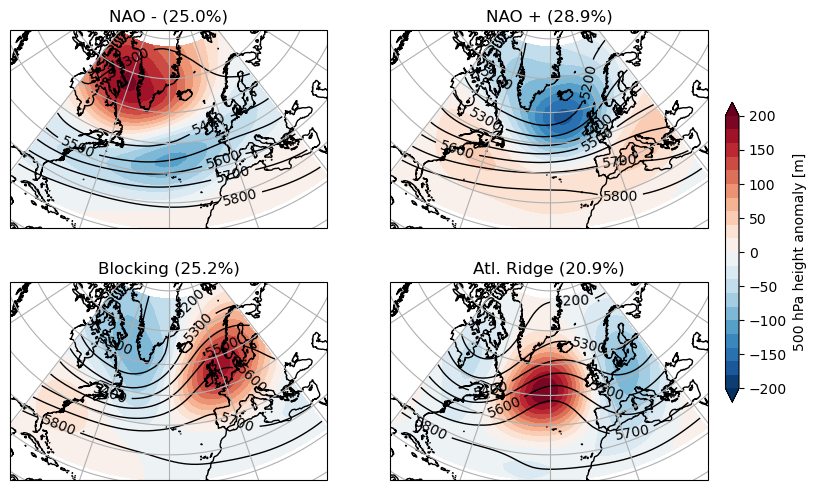

In [63]:
lons = cluster_centroids.lon.values
lats = cluster_centroids.lat.values

plot_clusters(cluster_centroids, z500_clim, lons, lats)